### 1d

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
year_to_seconds = 365.*24*3600
t0 = 0
tf = 1*year_to_seconds
period = 1*year_to_seconds # Earth year in seconds
theta0 = 0
a = 1*1.496e13 # 1 AU in cm
e = 0 # circle
m_star = 1*1.988e33 # 1 solar mass in grams 
r0 = a*(1-e) # periastron, aka initial/seeding distance
G = 6.674e-8 # in cgs (previously 1 in solar mass/AU/year units)

def update_theta(specific_L, r, delta_t):
    delta_theta = (specific_L/(r**2)) * delta_t
    return delta_theta

def calc_specific_L(a, e, m_star):
    return np.sqrt(G * m_star * a * (1-e**2))

def calc_r(a, e, theta):
    numerator = a*(1-e**2)
    denominator = 1 + e*np.cos(theta)
    return numerator/denominator

specific_L = calc_specific_L(a, e, m_star)
print(specific_L)

4.455198800502622e+19


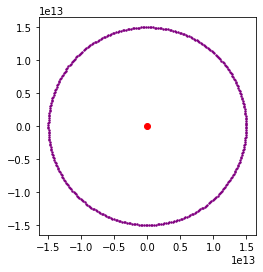

       time             r     theta
0       0.0  1.496000e+13  0.000000
1   86400.0  1.496000e+13  0.017200
2  172800.0  1.496000e+13  0.034399
3  259200.0  1.496000e+13  0.051599
4  345600.0  1.496000e+13  0.068798


In [24]:
rs = []
thetas = []
times = np.linspace(t0, tf, 366) # one iteration per day
delta_t = 1.*year_to_seconds/365
theta = theta0 # initialize theta at theta0
r = r0 # initialize r at r0
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple', s=2)
    
plt.scatter(0, 0, color='red')
plt.show()

df = pd.DataFrame()
df['time'] = times
df['r'] = rs
df['theta'] = thetas
print(df.head())

### 2d

First just visualizing what my birthday planet looks like 

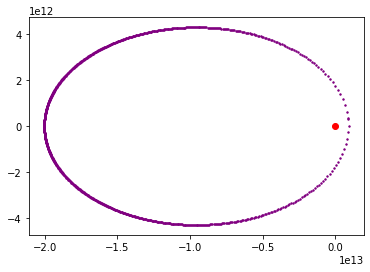

In [242]:
# first just visualizing what my birthday planet looks like 
def calc_period(a, m_star):
    tf = ((4*np.pi**2*a**3)/(G*(m_star)))**0.5 # take m_p as zero, since m_p << m_star
    return tf

rs = []
thetas = []
a = 0.7*1.496e13
e = 363./365 # from my bday
# old bday was so close to the end of the calendar that it needed a super low delta_t to make delta_thetas reasonable
# but we're not asked for this in 2d, so gonna return to e = 363/365 for the temperature part after this
e = 333./365 

specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
times = np.linspace(t0, tf, 1000) 
delta_t = times[1]-times[0]

#fig = plt.figure()
#ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple', s=2)
plt.scatter(0, 0, color='red')

plt.show()

#df = pd.DataFrame()
#df['time'] = times
#df['r'] = rs
#df['theta'] = thetas
#print(df.head())

In [40]:
#print(delta_t)
#print(np.linspace(t0, tf, 10000)[1], np.linspace(t0, tf, 10000)[0])
#print(np.linspace(t0, tf, 1000)[1], np.linspace(t0, tf, 1000)[0])
#print(np.linspace(t0, tf, 100)[1], np.linspace(t0, tf, 100)[0])

#### Instantaneous temperature

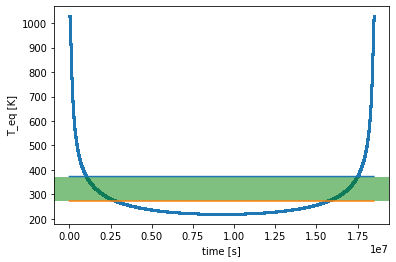

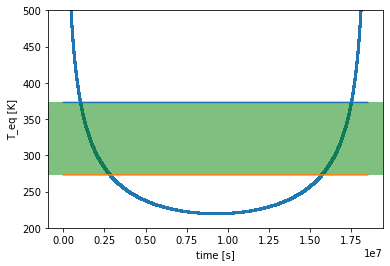

In [474]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.7*1.496e13
e = 363./365 # from my bday
e = 333./365 # less pathological e
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(16*np.pi*stefan_boltzmann*d**2))**0.25

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
#print("period: ", tf)
times = np.linspace(t0, tf, 1000000) 
delta_t = times[1]-times[0]
#print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    #print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(200, 500)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

In [475]:
theta 

6.28352004942388

In [476]:
print(max(rs)/1.496e13)
print(min(rs)/1.496e13)
print(max(temps), min(temps))

1.3386301369857012
0.061369863013698615
1028.424551016582 220.20121635729538


This is quite different from my analytic answers for Temp(min(r)) and Temp(max(r)) in 2c because I'm using non-birthday eccentricity (it does track with analytic answer when I do use the proper eccentricity, though). Even at this more modest eccentricity, the planet leaves the habitable zone at and near both periastron (gets way too hot) and apoastron (gets too cold), due to its high-eccentricity orbit.

Previously I needed ~1e7 points to not have pathologically high delta_thetas for old e, leading to orbits ending noticeably past 2pi. Using this many points led to a really slow shuffle operation later on for moving average, so I used a less pathological e to enable smaller number of timesteps --> smaller delta_t's. Later on, I realized I could just cycle with pandas by concatenating df with itself. Still, e=363/365 would cause further problems in the heat capacity portion, and it was still taking a longish time to run everything with so many points.

Anyway, for the rest of this I use 333/365 as my eccentricity. The following section, though, uses a more modest e for testing purposes.

### Ignore: this is for sanity checking subsequent plots with better-behaved eccentricities

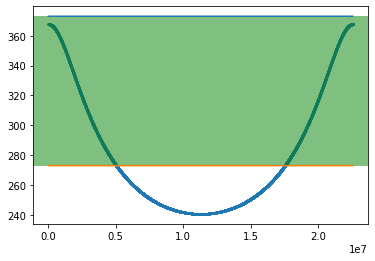

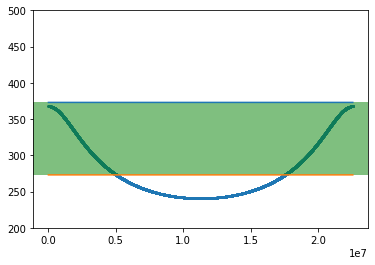

In [364]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.8*1.496e13
e = 363./365 # from my bday
#e = 333./365 # less pathological e
#e = 33./365 # well-behaved e for sanity check
e = 0.4
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(4*np.pi*stefan_boltzmann*d**2))**0.25

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
#print("period: ", tf)
#times = np.linspace(t0, tf, 1000000) 

times = np.linspace(t0, tf, 10000) 
delta_t = times[1]-times[0]
#print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    #print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(200, 500)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

In [222]:
theta

6.284785306622522

### Resume regular programming

#### Now with moving window average to model heat capacity

In [490]:
delta_t

18.485170546240536

window size:  350551


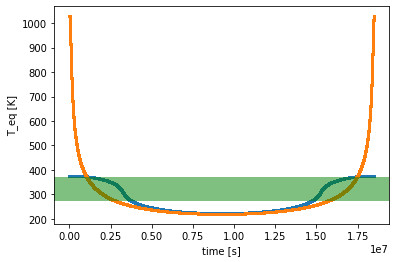

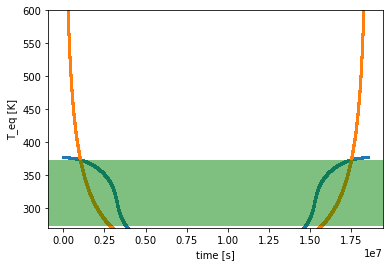

In [492]:
window = 75*24*3600 # choosing 75 days to split the difference of 2-3 months
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(270, 600)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

In [388]:
#pd.concat([df.iloc[1:], df.iloc[:1]]).iloc[:window_size] # original way to manually cycle through times

In [ ]:
"""
window = 75*24*3600 # choosing 75 days to split the difference of 2-3 months
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)
avg_temps = []
for i in range(len(times)):
    #while 
    #index = i-20
    #temp_temps = temps[i:] + temps[:i] # shuffle window across and then back around times
    temp_temps = pd.concat([df.iloc[i:], df.iloc[:i]]).iloc[:window_size] # faster pandas version of the above
    #keep = temp_temps[:window_size]
    avg_temp = np.mean(temp_temps.temps)
    avg_temps.append(avg_temp)
    
plt.scatter(times, avg_temps, s=2)
plt.show()
"""

In [ ]:
#plt.scatter(times, temps, s=2)
#plt.scatter(times, avg_temps[window_size:] + avg_temps[:window_size], s=2)
#plt.show()

#### Now with a land planet

window size:  8763


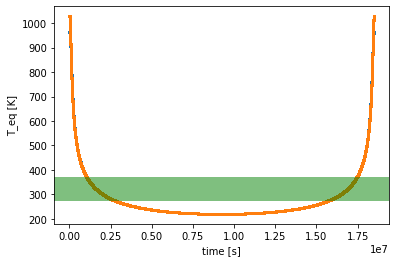

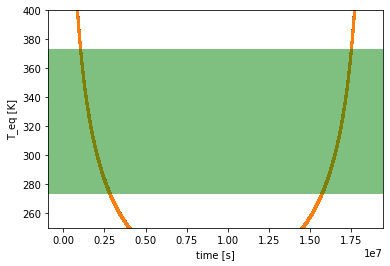

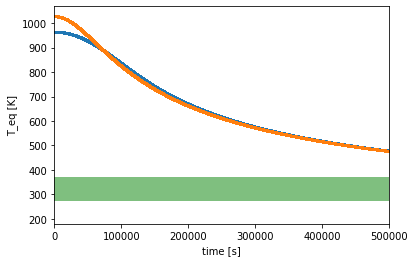

In [493]:
window = 75*24*3600/40 # land planet has 40x smaller heat capacity, per Dressing et al 2010 Table 1
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(250, 400)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlim(0, 5e5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

The second plot zooms in on the habitable zone, while the third plot zooms in on the region near periastron where instantaneous and window-averaged temperatures finally do deviate noticeably.

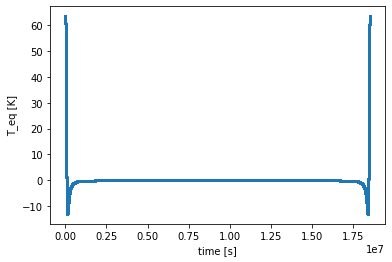

In [495]:
# plot the difference
plt.scatter(df.times, df.temps - df.rolling(window_size, center=True).mean().temps, s=2)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

Looks like cutting the window down to 75/40, or 1.875, days (out of a period of 0.7 AU), is enough to make it a negligibly impactful averaging kernel for most of a highly eccentric planet's orbit, especially apoastron. The major exception is near periastron, when the steep change in temperature leads to a decently-sized difference (and an even more significant difference when using my actual birthday) between windowed average and instantaneous value. Perhaps with finer delta_t's, we might be able to catch the planet at more positions closer to periastron and get a more nuanced temperature curve, but such is the life of a highly-eccentric planet.

#### What would it take to stay entirely within HZ?

In [496]:
np.mean(temps)

283.19711869121363

Nice...so at least in the worst case scenario where I'm taking the average of the entire time series, I do get a temperature within the habitable zone. This means there exists a minimum window size that will still allow my averaged temperature to lie within the habitable zone throughout its orbit.

In [497]:
#0.999*tf/(24*3600)

window size:  983999
number of timesteps:  1000000


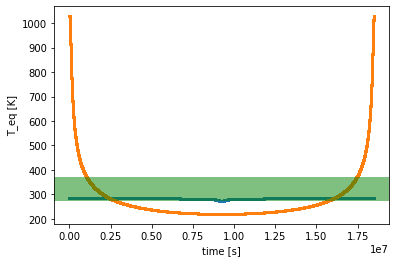

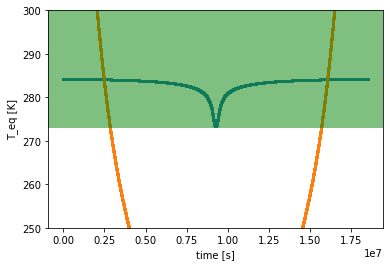

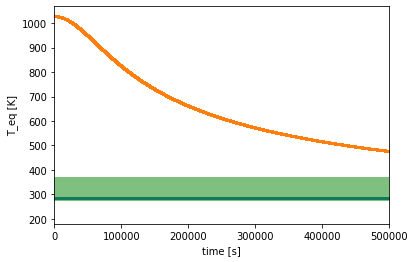

In [498]:
window = 75*24*3600
window = 0.984*tf # tuned as far as to three significant figures, probably overkill
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)
print("number of timesteps: ", len(times))

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(250, 300)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlim(0, 5e5)
plt.xlabel('time [s]')
plt.ylabel('T_eq [K]')
plt.show()

In [499]:
# tuning
window = 75*24*3600
window = 0.984*tf
window_size = int(np.floor(window/delta_t))
min(df.rolling(window_size, center=True).mean().temps.dropna())

273.34388744889986

In [500]:
window/(75*24*3600)

2.8070045722365533

A window size of 0.984 times the entire time series is the minimum needed to achieve always-habitable zone. This is 2.81 times that of the ocean world window size, or 112.4 times that of the land world window size. Since window size scales linearly with effective heat capacity, our required effective heat capacity is 112.4 times that of C_l, or 112.4 * 5.25e9 erg cm^-2 K^-1. Basically, our planet *really* needs whatever help it can get to prolong temperature change timescales.

In [501]:
112.4*5.25e9

590100000000.0

Even at this slightly more modest eccentricity, I can't find any materials online that are nearly 3x the specific heat capacity of seawater. :( Maybe an Icy Hot Patch?

### 3b

Plot the isolation mass for a growing planet (in units of Earth masses) as a function of distance from the Sun (in units of AU, from 0 to 10 AU).

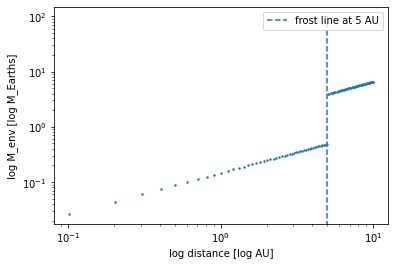

In [359]:
def sigma_p(r):
    sigma0 = 1.7e3 # g cm^-2
    try:
        if (r < 5*1.496e13) & (r > 0): # < 5 AU, the current frostline (Jewitt et al 2007 [but really Wikipedia])
            #return 0.01*sigma0*(r)**-1.5
            return 0.01*sigma0*(r/1.496e13)**-1.5
        elif r >= 5*1.496e13:
            #return 0.04*sigma0*(r)**-1.5
            return 0.04*sigma0*(r/1.496e13)**-1.5

    except ValueError:
        print(r, "invalid r")

def calc_miso(r, m_star):
    #print(sigma_p(r))
    m_isos = []
    for r_elt in r:
        #print(r_elt, (sigma_p(r_elt))**1.5, r_elt**3)
        #m_isos.append(166 * ((m_star/1.988e33)**0.5) * ((sigma_p(r_elt))**1.5) * r_elt**3)
        m_isos.append(166 * ((m_star)**-0.5) * ((sigma_p(r_elt))**1.5) * r_elt**3)
    return m_isos

distances = 1.496e13*np.linspace(0, 10, 100)[1:] # avoid dividing by zero
m_isos = calc_miso(distances, m_star)
#print(m_isos)
m_isos = [m_isos_elt/5.972e27 for m_isos_elt in m_isos] # convert to Earth masses
distances = np.linspace(0, 10, 100)[1:] # back to AU for plotting
plt.scatter(distances, m_isos, s=2)
plt.vlines(5, 0, 100, linestyles='dashed', label='frost line at 5 AU')
plt.xlabel('log distance [log AU]')
plt.ylabel('log M_env [log M_Earths]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

### 3c

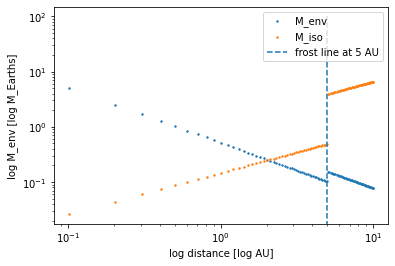

In [418]:
def calc_t_disk(r):
    t4 = 6e9 * (r/1.496e13)**-3 
    return t4**0.25

def calc_m_env(rho_m, t_disk, r):
    term1 = rho_m**-0.5
    term2 = t_disk**1.5
    term3 = (np.log(2*rho_m*r/sigma_p(r)))**1.5
    
    return 1.6e-6*term1*term2*term3

rho_earth = 5.5 # proxy for rocky planet within snow line; Earth average density
rho_pluto = 1.9 # proxy for icy body beyond snow line; Pluto average density
#rho_earth = 3
#rho_pluto = 1
m_envs = []
distances = 1.496e13*np.linspace(0, 10, 100)[1:] # avoid dividing by zero
for r_elt in distances:
    #print(calc_t_disk(r_elt))
    if (r_elt < 5*1.496e13) & (r_elt > 0): 
        m_env = calc_m_env(rho_earth, calc_t_disk(r_elt), r_elt)
        m_envs.append(m_env)
        
    elif r_elt >= 5*1.496e13: # icy body density beyond snow line
        m_env = calc_m_env(rho_pluto, calc_t_disk(r_elt), r_elt)
        m_envs.append(m_env)
        
#m_envs = [m_envs_elt/5.972e27 for m_envs_elt in m_envs] # convert to Earth masses
m_envs = [m_envs_elt for m_envs_elt in m_envs] # convert to Earth masses
distances = np.linspace(0, 10, 100)[1:] # back to AU for plotting
plt.scatter(distances, m_envs, s=2, label='M_env')
plt.scatter(distances, m_isos, s=2, label='M_iso')
plt.vlines(5, 0, 100, linestyles='dashed', label='frost line at 5 AU')
plt.xlabel('log distance [log AU]')
plt.ylabel('log M_env [log M_Earths]')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


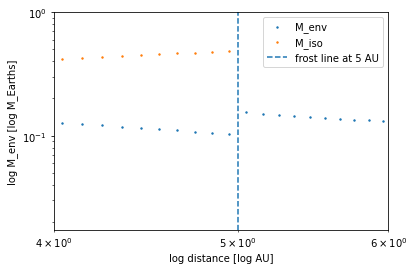

In [419]:
# zoom in
plt.scatter(distances, m_envs, s=2, label='M_env')
plt.scatter(distances, m_isos, s=2, label='M_iso')
plt.vlines(5, 0, 100, linestyles='dashed', label='frost line at 5 AU')
plt.xlabel('log distance [log AU]')
plt.ylabel('log M_env [log M_Earths]')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0, 1)
plt.xlim(4,6)
plt.legend()
plt.show()

### 3d

The planets that formed closer to the Sun have higher M_envs but lower M_isos. That is, their threshold for accreting a significant atmosphere is higher, while the mass at which their mass accretion drastically slows down is lower (and so their terminal mass is also lower), which is the opposite of what's needed to acquire substantial gas envelopes. Conversely, planets forming beyond the snow line have lower thresholds for accreting such envelopes, as well as higher masses at which mass accretion slows down.